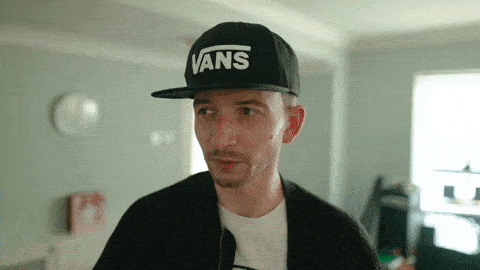

#### Heart disease refers to a range of conditions that affect the heart's structure and function. It includes coronary artery disease, heart failure, arrhythmias, and valvular heart diseases. Risk factors include high blood pressure, high cholesterol, smoking, obesity, diabetes, and a family history of heart disease. Early detection and lifestyle modifications are important for managing heart disease.

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [33]:
df = pd.read_csv("/kaggle/input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv")
df.head(10)

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   
5          Yes  28.87     Yes              No     No             6.0   
6           No  21.63      No              No     No            15.0   
7           No  31.64     Yes              No     No             5.0   
8           No  26.45      No              No     No             0.0   
9           No  40.69      No              No     No             0.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race  \
0          30.0          No  Female        55-59  White   
1           0.0          No  Female  80 or older  White   
2          30.0          No    Male        65-69  White   
3           0.0          No  Female        75-79  White   
4           0.0         Yes  Female        40-44  White   
5           0.0         Yes  Female        75-79  Black   
6           0.0          No  Female        70-74  White   
7           0.0         Yes  Female  80 or older  White   
8           0.0          No  Female  80 or older  White   
9           0.0         Yes    Male        65-69  White   

                  Diabetic PhysicalActivity  GenHealth  SleepTime Asthma  \
0                      Yes              Yes  Very good        5.0    Yes   
1                       No              Yes  Very good        7.0     No   
2                      Yes              Yes       Fair        8.0    Yes   
3                       No               No       Good        6.0     No   
4                       No              Yes  Very good        8.0     No   
5                       No               No       Fair       12.0     No   
6                       No              Yes       Fair        4.0    Yes   
7                      Yes               No       Good        9.0    Yes   
8  No, borderline diabetes               No       Fair        5.0     No   
9                       No              Yes       Good       10.0     No   

  KidneyDisease SkinCancer  
0            No        Yes  
1            No         No  
2            No         No  
3            No        Yes  
4            No         No  
5            No         No  
6            No        Yes  
7            No         No  
8           Yes         No  
9            No         No

In [34]:
df.shape

(319795, 18)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [36]:
df.describe()

BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000

In [37]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [38]:
df.duplicated().sum()

18078

In [39]:
df.drop_duplicates(inplace=True)

# EDA

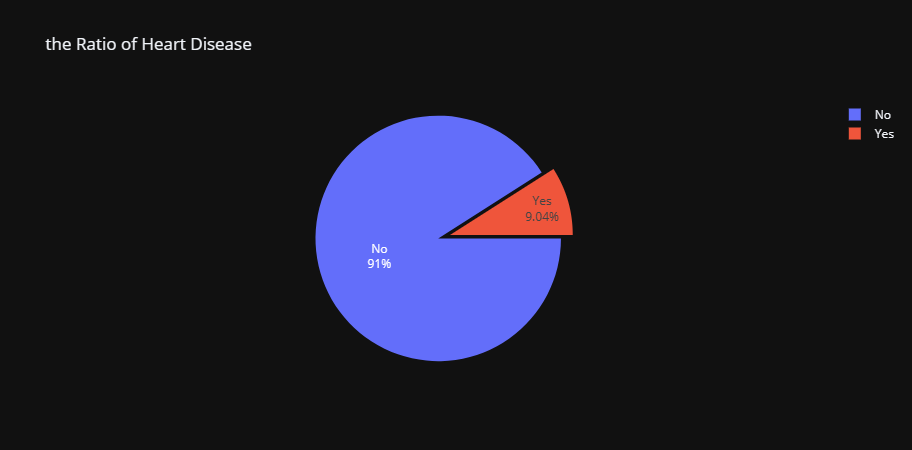

In [40]:
fig = px.pie(df, names = 'HeartDisease', title = 'the Ratio of Heart Disease', template = 'plotly_dark')
fig.update_traces(rotation=90, pull = [0.1], textinfo = "percent+label")
fig.show()

### here we have imbalanced data 91% vs 9%, we will work on it later

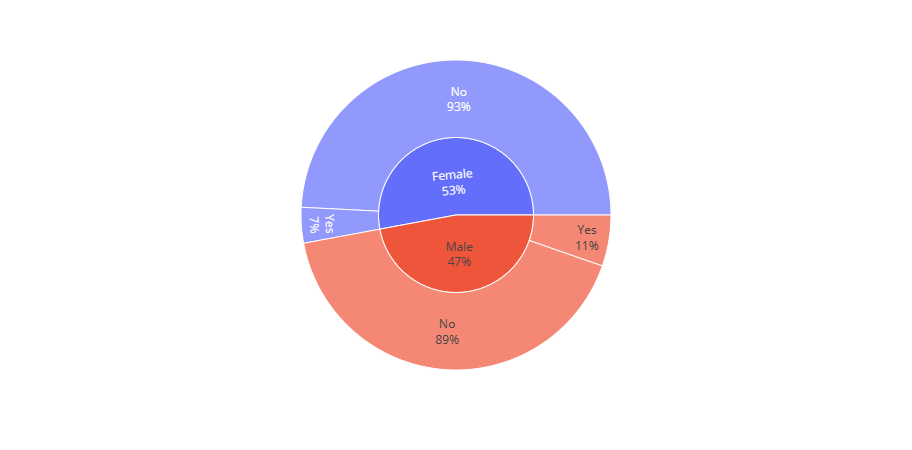

In [41]:
fig = px.sunburst(df, path=['Sex','HeartDisease']).update_traces(textinfo='label+percent parent')
fig.show()

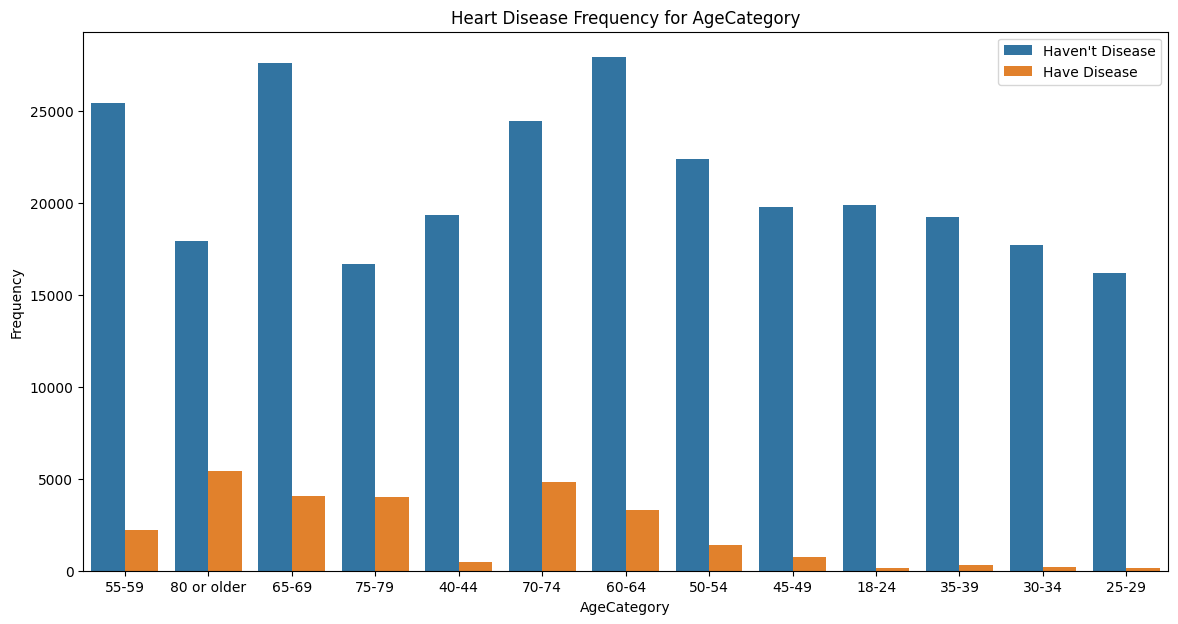

In [42]:
plt.figure(figsize=(14,7))
sns.countplot(x='AgeCategory', data=df, hue='HeartDisease')
plt.title('Heart Disease Frequency for AgeCategory')
plt.xlabel('AgeCategory')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

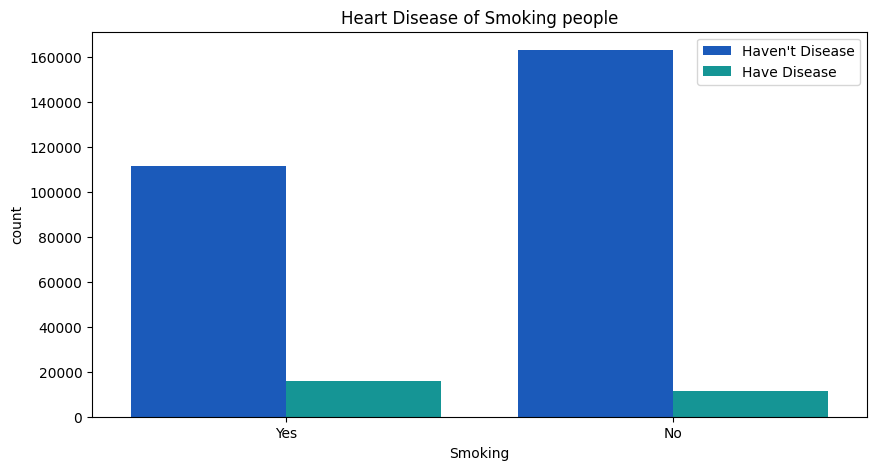

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(x='Smoking',data=df,hue='HeartDisease',palette='winter')
plt.title('Heart Disease of Smoking people')
plt.legend(["Haven't Disease", "Have Disease"])
plt.xlabel('Smoking')
plt.show()

In [44]:
df.groupby(['AlcoholDrinking','HeartDisease'])['HeartDisease'].count()

AlcoholDrinking  HeartDisease
No               No              254016
                 Yes              26120
Yes              No               20440
                 Yes               1141
Name: HeartDisease, dtype: int64

In [45]:
HeartDisease_yes = df.query("HeartDisease == 'Yes'")

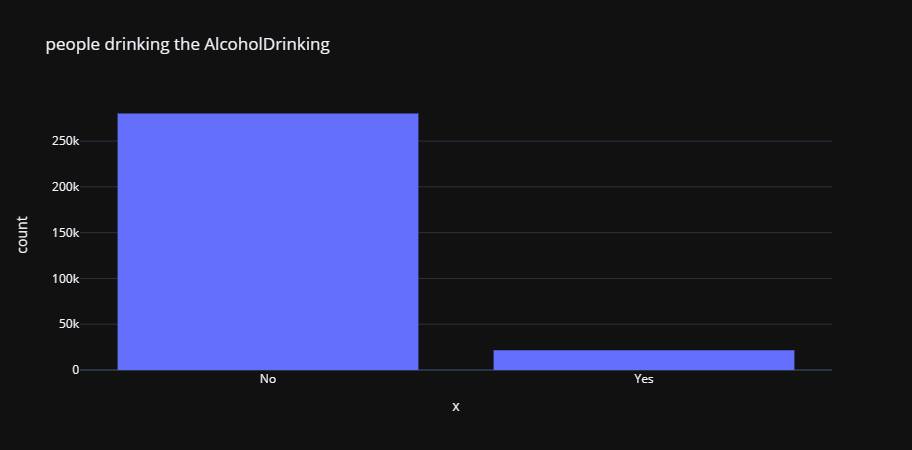

In [46]:

fig = px.histogram(HeartDisease_yes, x = df['AlcoholDrinking'],
                      title = 'people drinking the AlcoholDrinking', text_auto = 'd3-format', template = 'plotly_dark')
fig.show()

## Conclusions
* Heart disease surveillance is more common in men than in women.
* Smoking contributes to heart disease.
* Drinking alcohol does not affect (slightly reduces) the risk of heart disease, which is unusual.
* The risk of heart disease increases with age.

# outliers

BMI                  Axes(0.125,0.11;0.168478x0.77)
PhysicalHealth    Axes(0.327174,0.11;0.168478x0.77)
MentalHealth      Axes(0.529348,0.11;0.168478x0.77)
SleepTime         Axes(0.731522,0.11;0.168478x0.77)
dtype: object

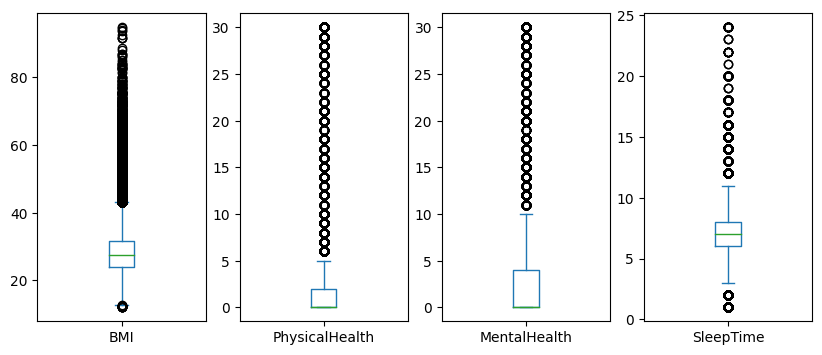

In [47]:
df.plot(kind = "box", figsize = (10,4), subplots = True)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



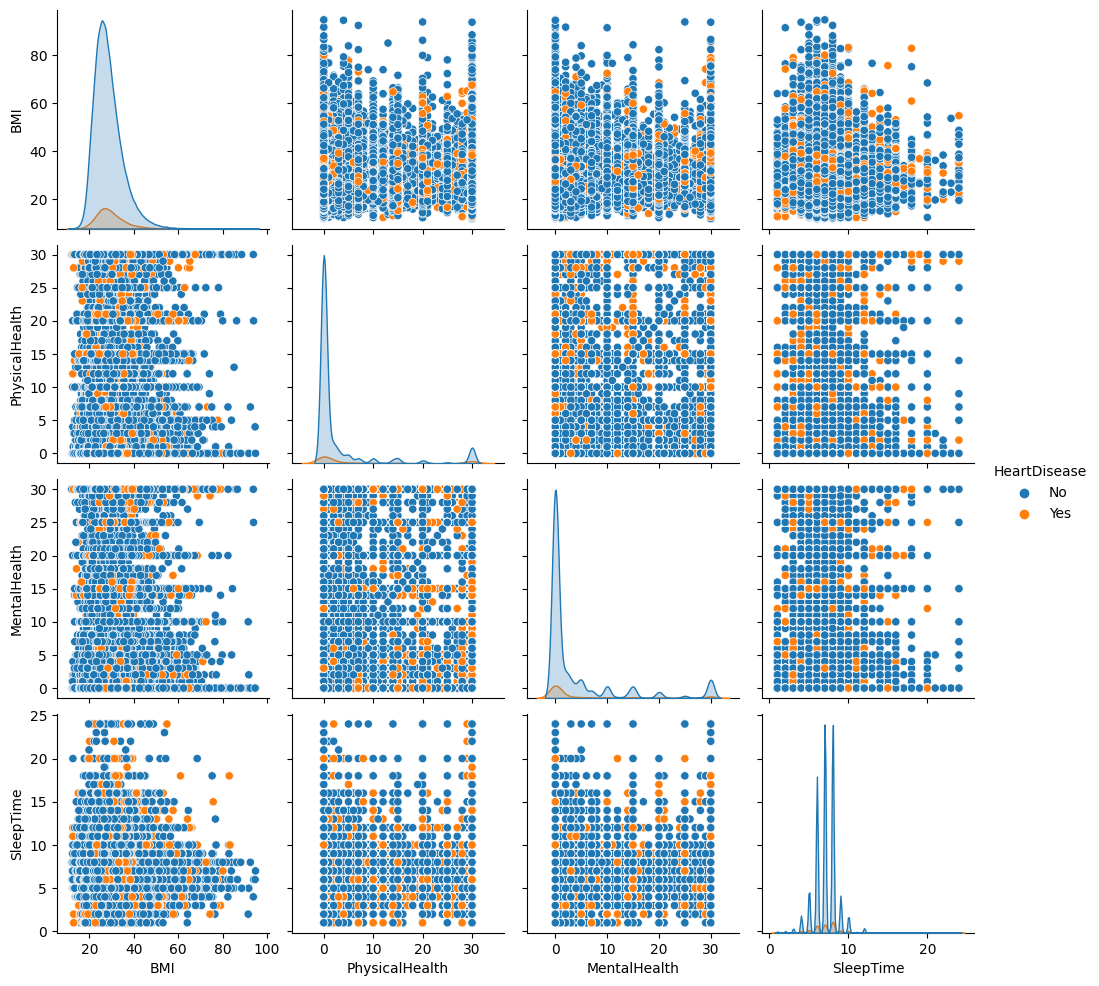

In [48]:
sns.pairplot(data = df , hue= 'HeartDisease')


In [49]:
data = df.copy()

In [50]:
from scipy.stats import zscore

zscore= zscore(data[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']])


In [51]:
z_scores = np.abs(zscore)
filtered_data = (z_scores<3).all(axis=1)

In [52]:
(data.shape[0] - data[filtered_data].shape[0]) / data.shape[0]

0.1285741274107856

### 12.8% is a large percentage, so we cannot drop those outliers. If the percentage is less than that, we can drop them, This will be in normal cases only, but in case of imbalanced data, it is recommended to keep outliers.

# Modeling

In [53]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()
object_columns

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [54]:
le = LabelEncoder()
df[object_columns] = df[object_columns].apply(le.fit_transform)

In [55]:
X, y = df.drop(labels='HeartDisease', axis=1), df['HeartDisease']

In [56]:
SC = StandardScaler()
X = SC.fit_transform(X)

In [57]:
def evaluate_models(X, y):
    results = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = [
        ('Logistic Regression', LogisticRegression()),
        ('Decision Tree', DecisionTreeClassifier()),
        ('Random Forest', RandomForestClassifier()),
        ('XGBoost', XGBClassifier())
    ]

    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        results.append((name, accuracy, precision, recall, f1))

    df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
    df_styled = df.style.highlight_max(subset=['Accuracy', 'Precision', 'Recall', 'F1'], color='lightblue')
    display(df_styled)

## Before Sampling

* In high risk prediction situations like the medical field in our case, we always rely on “recall”. The number of true positives divided by the number of true positives plus the number of false negatives.
* In most high risk prediction cases (such as our example here: Heart Disease), recall is a more important evaluation metric than accuracy.

In [58]:
evaluate_models(X,y)

## Random Undersampling:
* Random undersampling involves randomly selecting samples from the majority class to reduce its size and make it comparable to the minority class. This technique helps balance the class distribution but may discard potentially useful information present in the majority class.

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_unsampled, y_unsampled = rus.fit_resample(X_train, y_train)

In [61]:
evaluate_models(X_unsampled, y_unsampled)

### Random Oversampling:
* Random oversampling involves randomly duplicating samples from the minority class to increase its size and match the majority class. This technique helps balance the class distribution, but it may lead to overfitting and poor generalization if the minority class is excessively overrepresented.

In [62]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_ovsampled, y_ovsampled = ros.fit_resample(X, y)

In [63]:
evaluate_models(X_ovsampled, y_ovsampled)

### SMOTE (Synthetic Minority Over-sampling Technique):
* SMOTE is a popular oversampling technique that generates synthetic samples for the minority class. It selects a sample from the minority class and finds its k-nearest neighbors. It then creates new synthetic samples by interpolating between the selected sample and its neighbors. This technique helps address the class imbalance by introducing diversity and reducing overfitting.

In [64]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_smsampled, y_smsampled = smote.fit_resample(X, y)

In [65]:
evaluate_models(X_smsampled, y_smsampled)

# K-Fold Cross Validation

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

model = LogisticRegression()

num_folds = 5

kf = KFold(n_splits=num_folds, shuffle=True)


scores = cross_val_score(model, X, y, cv=kf)


for fold, score in enumerate(scores):
    print(f"Fold {fold+1}: {score}")


mean_score = np.mean(scores)
print(f"Mean Score: {mean_score}")


Fold 1: 0.9117062176852712
Fold 2: 0.9083255998939413
Fold 3: 0.9119036176524203
Fold 4: 0.9084400841854068
Fold 5: 0.9109755895464262
Mean Score: 0.9102702217926932


# Voting

In [67]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier(max_depth = 5 , max_features= 4)
clf3 = RandomForestClassifier(max_depth = 5 , max_features= 4)
clf4 = XGBClassifier( max_depth  = 5 ,  n_estimators  = 6 , learning_rate = 0.4)

In [68]:
v_clf = VotingClassifier(estimators=[('LR' , clf1) , ('DT' , clf2) , ("RF" , clf3) , ("xgb" , clf4)] , voting= 'soft')

In [69]:
v_clf.fit(X_train , y_train)

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('DT',
                              DecisionTreeClassifier(max_depth=5,
                                                     max_features=4)),
                             ('RF',
                              RandomForestClassifier(max_depth=5,
                                                     max_features=4)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical...
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.4, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=6, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...))],
                 voting='soft')

In [70]:
print (v_clf.score(X_train , y_train))
print (v_clf.score(X_test , y_test))

0.910627949273531
0.9103307702505634


# Feature Importance

In [71]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

In [72]:
X = df.drop(labels='HeartDisease', axis=1)

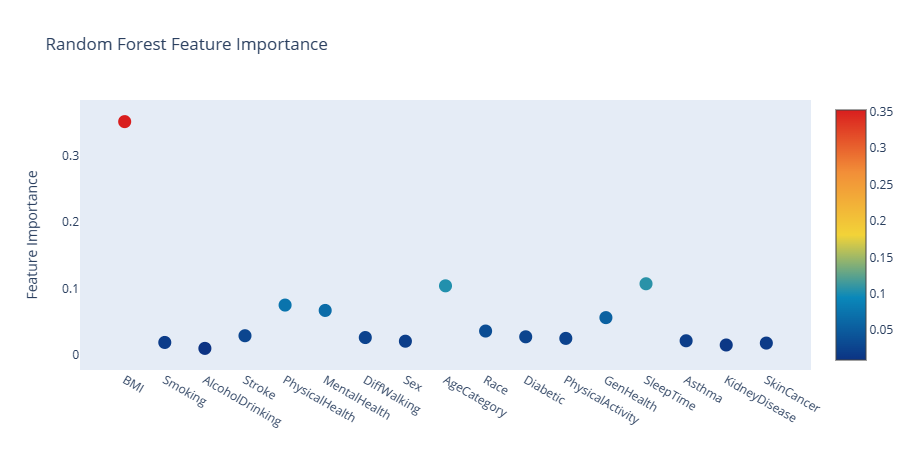

In [73]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
trace = go.Scatter(
    y = RF.feature_importances_,
    x = X.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        color = RF.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = X.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

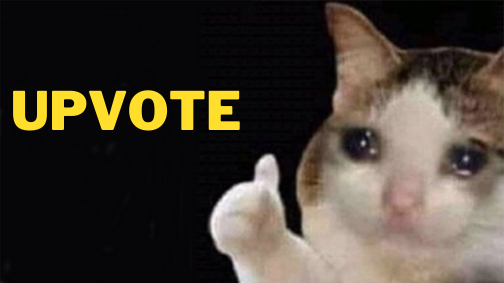